In [1]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Sequential

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape  , x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train.shape

(50000, 1)

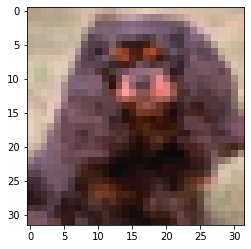

In [5]:
from matplotlib import pyplot as plt 
plt.imshow(x_train[19999] , cmap = "gray")

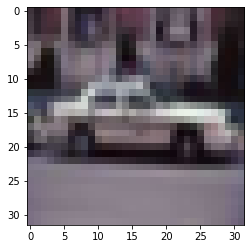

In [6]:
plt.imshow(x_train[29999] , cmap = "gray")

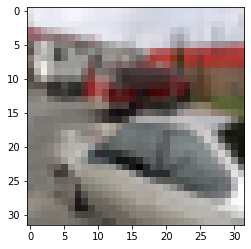

In [7]:
plt.imshow(x_train[49999] , cmap = "gray")

In [8]:
train_images = x_train / 255.0
test_images = x_test / 255.0 

In [9]:
train_images.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [18]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',activation=None,use_bias=False,input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Conv2D(filters=48, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=80, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=64))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=10))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.compile(optimizer = "adam",
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
            metrics = ["accuracy"])

In [20]:
model.fit(train_images , y_train , validation_split = 0.1 , epochs = 10 )


Epoch 1/10


c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1407/1407 [==============================] - 353s 250ms/step - loss: 1.5379 - accuracy: 0.4631 - val_loss: 1.5005 - val_accuracy: 0.5018
Epoch 2/10
1407/1407 [==============================] - 326s 231ms/step - loss: 1.2138 - accuracy: 0.5862 - val_loss: 1.2159 - val_accuracy: 0.5630
Epoch 3/10
1407/1407 [==============================] - 318s 226ms/step - loss: 1.0610 - accuracy: 0.6376 - val_loss: 1.2077 - val_accuracy: 0.5854
Epoch 4/10
1407/1407 [==============================] - 319s 227ms/step - loss: 0.9662 - accuracy: 0.6715 - val_loss: 0.8916 - val_accuracy: 0.6932
Epoch 5/10
1407/1407 [==============================] - 317s 226ms/step - loss: 0.8945 - accuracy: 0.6942 - val_loss: 0.8253 - val_accuracy: 0.7186
Epoch 6/10
1407/1407 [==============================] - 318s 226ms/step - loss: 0.8327 - accuracy: 0.7180 - val_loss: 0.8896 - val_accuracy: 0.6932
Epoch 7/10
1407/1407 [==============================] - 315s 224ms/step - loss: 0.7841 - accuracy: 0.7347 - val_loss: 0.811

In [17]:
_, accuracy = model.evaluate(test_images , y_test)
#modeldeki ilk fonksiyonu yazdırmamak içim _ koyduk
print("accuracy: %2f " %(accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.1598 - accuracy: 0.6078
accuracy: 60.780001 
